# ICS 434: DATA SCIENCE FUNDAMENTALS

## Hypothesis Testing: Examples


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Comparing Proportions

* The proportion of branded to unbranded generic medications is 1:5 (based on data published on www.statista.com)

* An NGO is exploring incentive to increase use of unbranded generics as to control healthcare spending

  * The incentives are tested in a geographical area for one year
  * In a survey of the medication sold in that area, out of the 4,434 drugs sold, 3,766 were generics

* Is the result different from the national proportion of branded to unbranded generic medications?
  * Note that we are merely asking whether the results are different, not whether the program worked


### Testing Proportion

*  A ratio of 1:5  means that 5/6 or ~ 83% of the drugs are generic
* After using a strategy to increase the usage of generics, 3,766 out of 4,434, or 84.9% of the drugs used were generic.

* Can this result be due to sampling alone or is the strategy causing the result to be different?

* We are interested in the distance between 83%, the national ratio and the survey results
  * Big distances are evidence that the method is causing some difference
  


### Deciding on the Test Statistic

* We can use the absolute distance between  the national proportion and that obtained from the survey

$$
∣ (\text{sample % of generic drugs})  − 83 ∣
$$

* Null Hypothesis: There is no difference between sample % of generic drugs sold and 83
  * I.e., the observed difference is merely due to sampling variance
<br>

* Alternative Hypothesis: The difference is unlikely to have arisen due to chance alone


### Simulating Data to Sampling Distribution of the Test Statistic

* What are the plausible values of the test statistic under the null hypothesis?

* If we were to sample data from outside of the testing area, a difference of the samples and national mean look like
  * G: Generic, B: Brand Name

<center><img src="https://www.dropbox.com/s/m2f6aj5y32qt4tf/method_ratio.png?dl=1" width="400"></center>

### Question 

* What does the resulting distribution look like?

<img src="https://www.dropbox.com/s/xrfx4hcw527r71y/answers_a_b.png?dl=1">

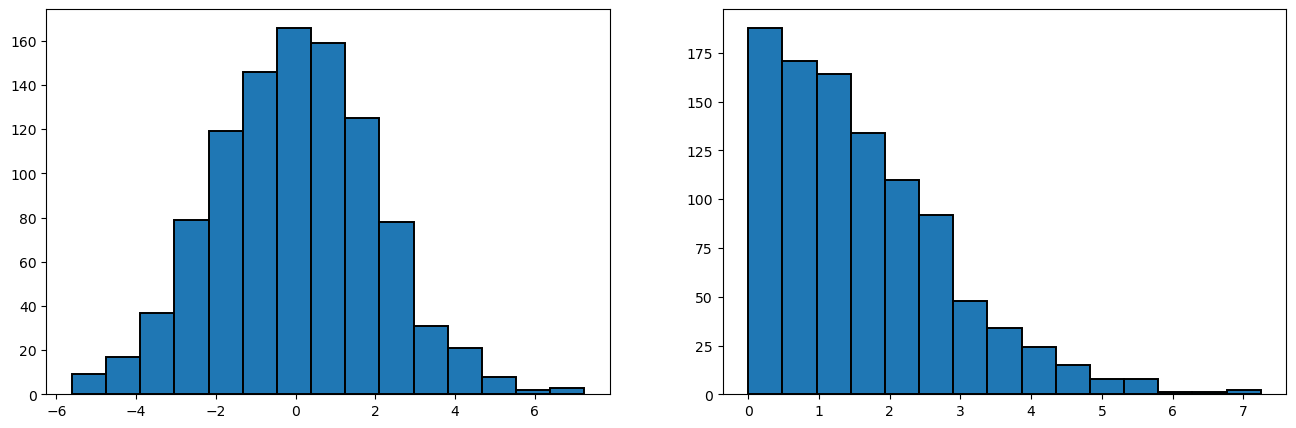

In [2]:
data = np.random.normal(0, 2, 1000)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=15, edgecolor='k', linewidth=1.4)
plt.subplot(1, 2, 2)
plt.hist(np.abs(data), bins=15, edgecolor='k', linewidth=1.4);

### Question

* Beyond sampling another dataset from the surveyed area, what other strategies can we use to explore the range of difference between 83% and samples that come from the same distribution?
  * I.e., how can we generate random samples that look like those produced under the null hypothesis without physically sampling new data?


In [3]:
# First example
model_proportions = [0.17, 0.83]

data = np.random.choice(["B","G"], p=model_proportions, size=4434)
data

array(['G', 'G', 'G', ..., 'G', 'G', 'G'], dtype='<U1')

In [4]:
sum(data == "G") / 4434 * 100

82.29589535408209

In [5]:
np.random.binomial(10, 0.83)

8

In [6]:
# Or using the binomial distribution
np.random.binomial(4434, 0.83) / 4434 * 100

83.085250338295

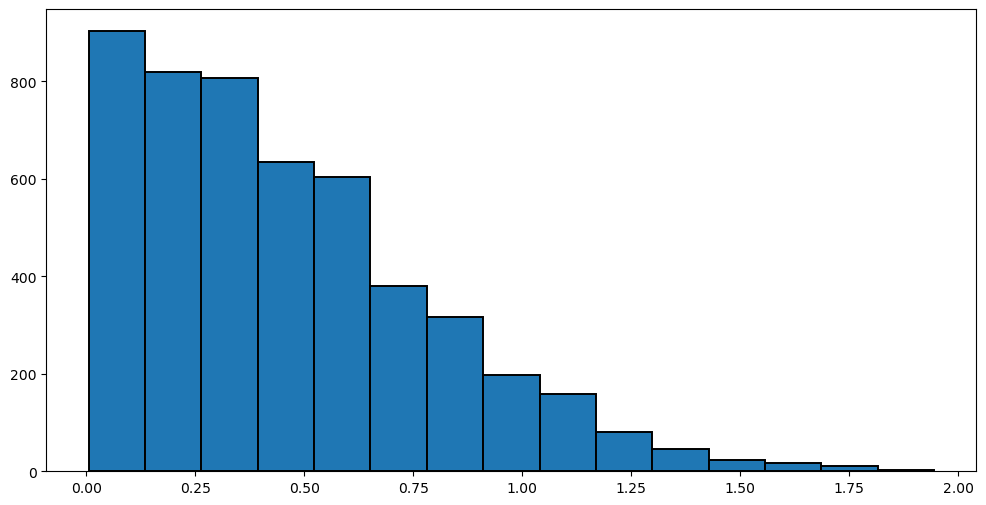

In [7]:
plt.figure(figsize=(12, 6))

sample_diffs_null = []
for _ in range(5000):
    sample_proportion = sum(np.random.choice([0, 1], p=model_proportions, size=4434)) / 4434 * 100
    sample_diff = np.abs(sample_proportion - 83)
    sample_diffs_null.append(sample_diff)
    
_ = plt.hist(sample_diffs_null, bins=15, edgecolor='k', linewidth=1.4)

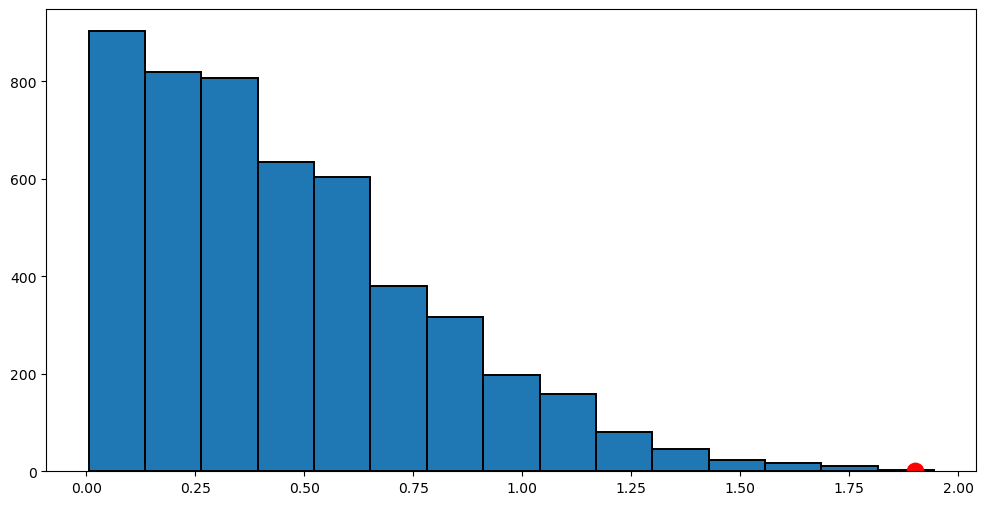

In [8]:
plt.figure(figsize=(12, 6))

_ = plt.hist(sample_diffs_null, bins=15, edgecolor='k', linewidth=1.4)
_ = plt.scatter(1.9, 0, color='r', s=140)

In [9]:
# computimg the p-value
p_value = sum(np.array(sample_diffs_null) >= 1.9) / len(sample_diffs_null)
p_value

0.0002

### Comparing Multiple Categories

* The method we used in the previous example extends to models with multiple categories

* The approach will be the same as before 

  * The only difference is that we have to come up with a new test  statistic 



### New Methods for Estimating Fish Diversity?

* You have a faster, autonomous machine learning-based method of estimating the diversity of fish in a given area

<img src="https://www.dropbox.com/s/bngjfwafy0umnhd/eDNA_fish.png?dl=1" alt="drawing" style="width:900px">


### New Methods for Estimating Fish Diversity -- Cont'd

* Your method can provide ratios for Tilapia, Blenny, Angelfish, Salmon and Other in a pisciculture pond
* You manually collected 2,000 and counted each ratio 
  * This tedious method is the current state of the art
* You used the eDNA to estimate the ratios
* Results are shown in the graph below


In [10]:
fish_proportions = pd.DataFrame({
    'kind': ['Tilapia', 'Blenny', 'Angelfish', 'Salmon', 'Other'], 
    'sampled': [0.20, 0.08, 0.12, 0.54, 0.06], 'eDNA': [0.26, 0.08, 0.08, 0.54, 0.04]}
                               )
fish_proportions

kind  sampled  eDNA
0    Tilapia     0.20  0.26
1     Blenny     0.08  0.08
2  Angelfish     0.12  0.08
3     Salmon     0.54  0.54
4      Other     0.06  0.04

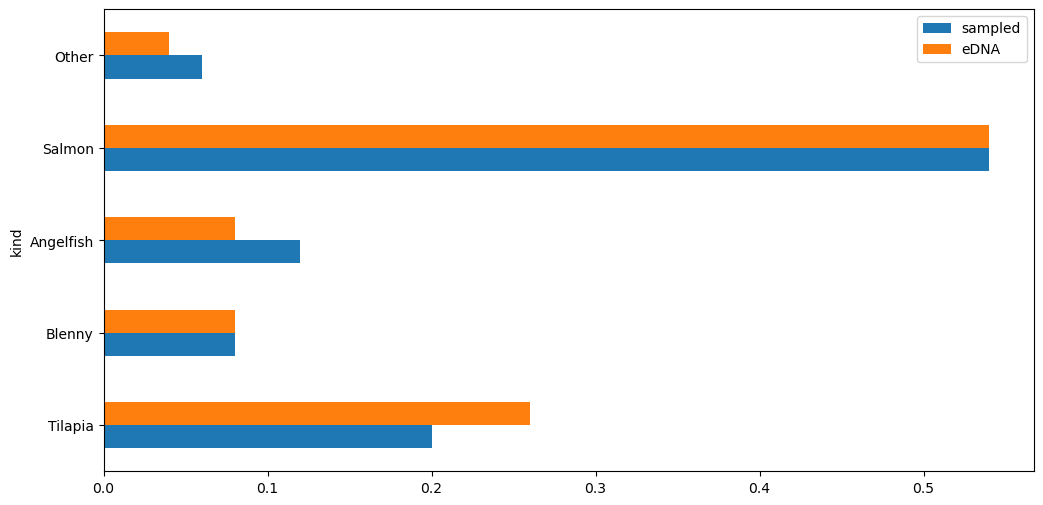

In [11]:
fish_proportions.plot.barh(x="kind", figsize=(12, 6));

### Question

* The data distributions look slightly different

* We need to answer the following questions:

  1. What are the null and alternative hypotheses?
  2. What is a useful test statistic for this problem?
  3. How can we generate data following the null hypothesis?


### 1. Null and Alternative Hypotheses

Our hypotheses are:

* Null hypothesis: The observed difference between both methods is due to sampling
  * If we were to sample again, we may see an even greater difference
  
* Alternative hypothesis: The difference is too big to be due to random chance alone
  * If we were to sample again, we would rarely, if ever, observe such a difference barplot
    
* Note that here again, we are not concerned in whether or not our method is over or underestimating a specific fish
  * We only care about whether or not the method yields equivalent results to the counting a large sample manually

### 2. The Test Statistic

* A good test statistic for this problem is one that allows us to quantify the difference between the two distribution
  * Discrepancy in graph's labels: `basin = sampled` and `collected = eDNA`

<img src="https://www.dropbox.com/s/3q9zr7clxhll3nj/difference.png?dl=1">

### The Distance Between Two Distributions

* We can quantify the distance between two distributions using the **total variation distance** 

  - Conceptually similar to the Euclidean distance between two vectors


In [12]:
fish_proportions["difference"] = fish_proportions["sampled"] - fish_proportions["eDNA"]
fish_proportions

kind  sampled  eDNA  difference
0    Tilapia     0.20  0.26       -0.06
1     Blenny     0.08  0.08        0.00
2  Angelfish     0.12  0.08        0.04
3     Salmon     0.54  0.54        0.00
4      Other     0.06  0.04        0.02

### The Total Variation Distance

* Notice that the sum of the entries of `difference` is 0
  * The positive entries add up to 0.06, exactly canceling the total of the negative entries which is -0.06 
<br>
<br>
* ``basin (sampled)`` and ``collected (eDNA)`` add up to 1
  * `1-1` needs to be equal to zero
<br>
<br>
* To avoid numbers canceling each other, we sum the absolute values and divide by two

$$
tvd = \frac{1}{2}\sum_{x \in \Omega}|P(x) - Q(x)|,
$$

$\hspace{0.6in}$ where `P` and `Q` are the two probability measure over $\Omega$

* Other distances but this one is intuitive and fast to compute

### The Total Variation Distance

* Notice that the sum of the entries of `difference` is 0
  * The positive entries add up to 0.06, exactly canceling the total of the negative entries which is -0.06 
<br>
<br>
* ``basin (sampled)`` and ``collected (eDNA)`` add up to 1
  * `1-1` needs to be equal to zero
<br>
<br>
* To avoid numbers canceling each other, we sum the absolute values and divide by two

$$
tvd = \frac{1}{2}\sum_{x \in \Omega}|P(x) - Q(x)|,
$$

$\hspace{0.6in}$ where `P` and `Q` are the two probability measure over $\Omega$


In [13]:
observed_tvd = 1/2 * sum(np.abs(fish_proportions['sampled'] - fish_proportions['eDNA']) )
observed_tvd

0.06

In [2]:
import numpy as np

In [14]:
sample_1 = np.random.choice([0, 1], p=[0.47, 0.53], size=1000)
sum(sample_1)/1000, (1000 - sum(sample_1))/1000



(0.519, 0.481)

### 3. Generating Data Under the Null Hypothesis

* Given two categories, Tilpia and Other, and proportion of each, p(Tilapia) = 0.15 and p(Other) = 1 - p(Tilapia) = 0.85

  * We can generate 200 instances (Tilapia or Other) using the binomial distribution


In [14]:
sample_1 = np.random.choice(['Tilapia', 'Other'], p=[0.15, 0.85], size=200)
print(sample_1[0:10])
print(sum(sample_1 == "Tilapia"))

['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other']
30


In [15]:
print(np.random.binomial(200, 0.15))
print(np.random.binomial(200, 0.15))

31
45


### The Multinomial Distribution

* The multinomial distribution generalizes the binomial distribution to multiple categories
  * The trials are independent
  * The probability of each outcome across trials is constant
  * The experiment consists of $n$ repeated trials
  * Each trial has a discrete number of possible outcomes (the categories)


In [16]:
# This is equivalent to the binomial above, 
# but returns the outcomes of each trial rather than the outcomes at the end
np.random.binomial(2000, p=0.15)

321

In [17]:
# This is equivalent to the multinomial returning the outcomes of each trial
np.random.choice(['Tilapia', 'Blenny', 'Angelfish', 'Salmon', 'Other'], p=[0.15, 0.18, 0.12, 0.54, 0.01], size=200)

array(['Blenny', 'Salmon', 'Blenny', 'Blenny', 'Salmon', 'Angelfish',
       'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon',
       'Tilapia', 'Tilapia', 'Angelfish', 'Angelfish', 'Blenny',
       'Tilapia', 'Angelfish', 'Angelfish', 'Salmon', 'Angelfish',
       'Blenny', 'Angelfish', 'Salmon', 'Salmon', 'Salmon', 'Salmon',
       'Blenny', 'Tilapia', 'Salmon', 'Salmon', 'Blenny', 'Salmon',
       'Angelfish', 'Blenny', 'Salmon', 'Salmon', 'Salmon', 'Angelfish',
       'Blenny', 'Salmon', 'Angelfish', 'Tilapia', 'Angelfish', 'Salmon',
       'Salmon', 'Tilapia', 'Other', 'Tilapia', 'Salmon', 'Salmon',
       'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Angelfish',
       'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon',
       'Salmon', 'Salmon', 'Blenny', 'Salmon', 'Salmon', 'Salmon',
       'Salmon', 'Blenny', 'Blenny', 'Angelfish', 'Salmon', 'Blenny',
       'Angelfish', 'Tilapia', 'Blenny', 'Blenny', 'Salmon', 'Salmon',
       'Tilapia', 'Tilapia', 'Ble

In [18]:
# Throw a dice 120 times
np.random.multinomial(120, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6] ) 

array([19, 22, 23, 16, 25, 15])

### 4. Simulating the Experiment

Given the sample proportions, what is the sampling distribution of the `tvd`?

1. Generate a random sample using the multinomial distributions and the observed proportions
2. Compute and store the sample `tvd`

In [19]:
samples_tvd = []

for i in range(5000):
    sample_proportions = np.random.multinomial(500, pvals=fish_proportions["sampled"]) / 500
    sample_tvd = 1/2 * np.sum(np.abs(fish_proportions['sampled'].tolist() - sample_proportions) )
    samples_tvd.append(sample_tvd)


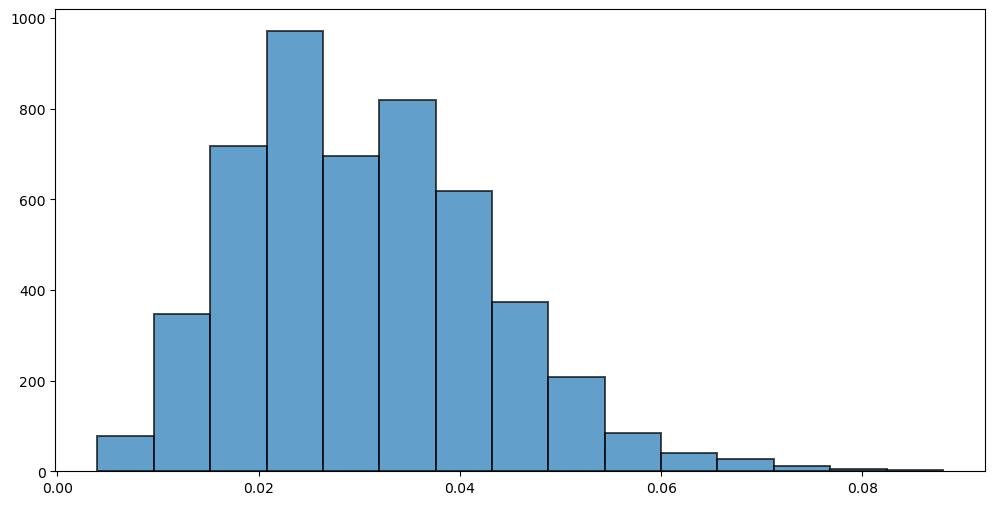

In [20]:
plt.figure(figsize=(12, 6))
_ = plt.hist(samples_tvd, bins=15, edgecolor='k', linewidth=1.4, alpha=0.7)

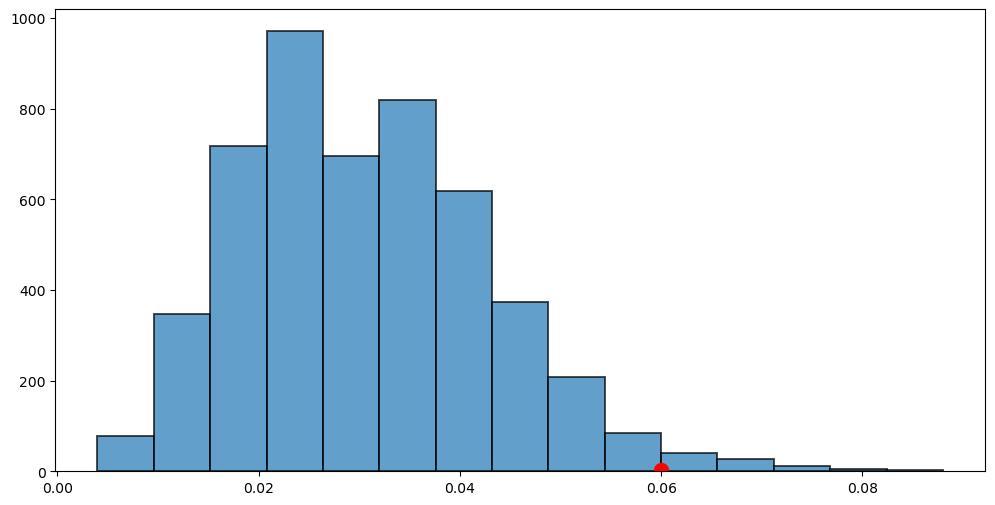

In [21]:
plt.figure(figsize=(12, 6))

_ = plt.hist(samples_tvd, bins=15, edgecolor='k', linewidth=1.4, alpha=0.7)
_ = plt.scatter(observed_tvd, 2, color='r', s=100);

In [22]:
p_value = np.sum([np.array(samples_tvd) >= observed_tvd]) / len(samples_tvd)
p_value

0.0174

In [15]:
0.0174 * 5000

87.0

### Notes About the Outcome

* Using a p-value threshold (significance level) of 0.05 the distribution of fish kind is different  using both methods 

  * `tvd` of 0.06 is far out in the tail of the histogram above
  
* The difference does not say *why* the distributions are different or what the difference might imply